In [276]:
# Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
# Read the dataset
df = pd.read_csv('US_Accidents_Dec20.csv')

In [278]:
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day


In [274]:
# df.info()

In [279]:
df.columns = df.columns.str.lower()

In [280]:
df.head(2)

,id,source,tmc,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day


In [281]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['year']=df['start_time'].dt.year
df['month'] = df['start_time'].dt.strftime('%b')
df['day'] = df['start_time'].dt.day
df['hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.strftime('%a')

Text(0.5, 0, 'Day of the week')

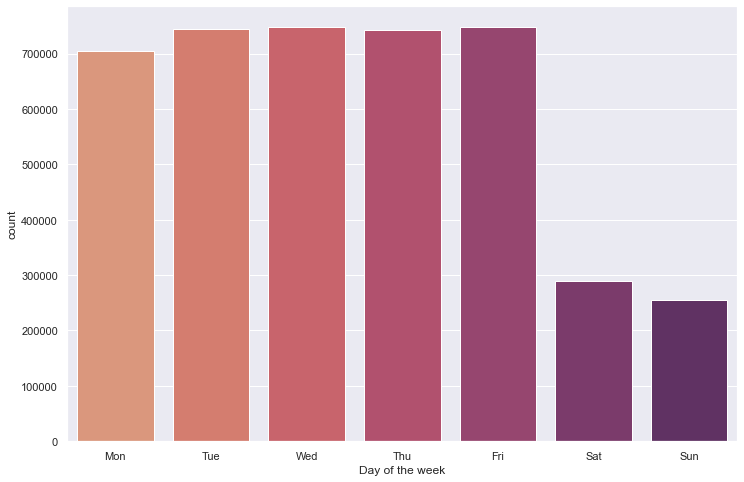

In [282]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['weekday'],data=df,palette="flare")
plt.xlabel('Day of the week')

Text(0.5, 0, 'Month')

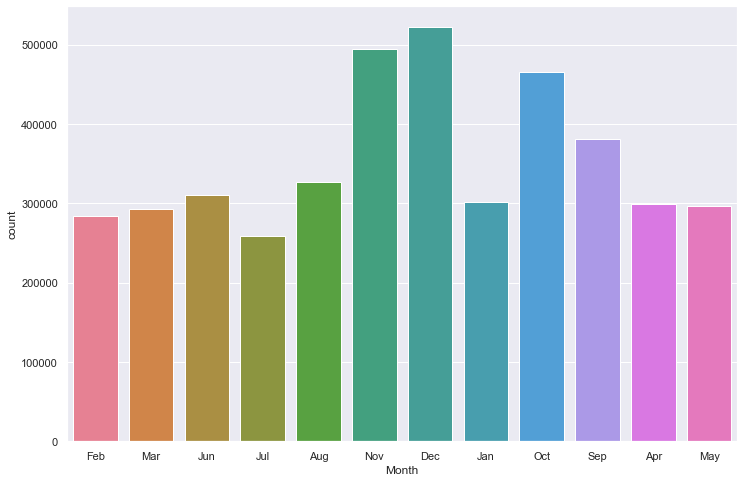

In [283]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['month'],data=df,palette="husl")
plt.xlabel('Month')

Text(0.5, 0, 'Hour of the day')

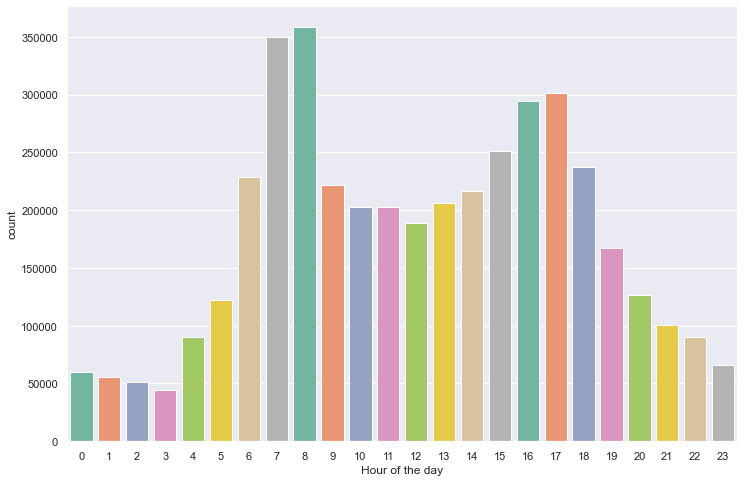

In [284]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['hour'],data=df,palette="Set2")
plt.xlabel('Hour of the day')

Text(0.5, 0, 'Year')

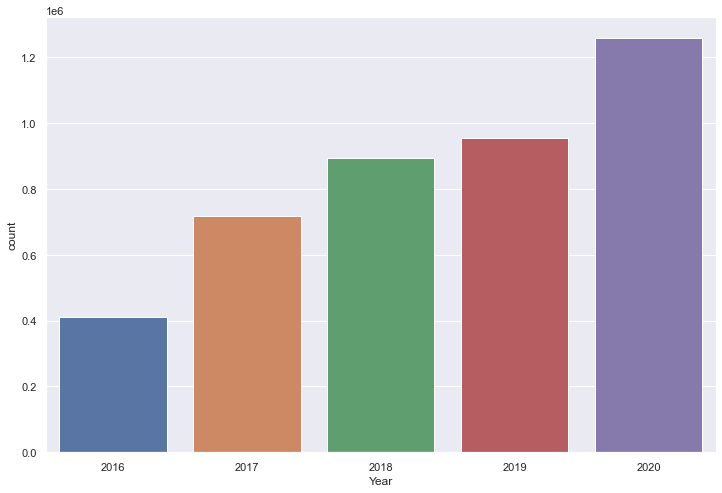

In [285]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['year'],data=df)
plt.xlabel('Year')

In [286]:
# Let's find out the time duration of the accidents
df['time_duration']=round((df['end_time']-df['start_time'])/np.timedelta64(1,'m'))

In [287]:
df['time_duration']

0          314.0
1           30.0
2           30.0
3           30.0
4           30.0
           ...  
4232536     29.0
4232537     27.0
4232538     28.0
4232539     29.0
4232540     29.0
Name: time_duration, Length: 4232541, dtype: float64

In [21]:
df['time_duration'].max()

1528013.0

In [289]:
n = 3

median = df['time_duration'].median()
std = df['time_duration'].std()

outlier = (df['time_duration']-median)>n*std

In [290]:
df[outlier] = np.nan

In [291]:
df['time_duration'].fillna(median,inplace=True)

In [292]:
df['time_duration']

0          314.0
1           30.0
2           30.0
3           30.0
4           30.0
           ...  
4232536     29.0
4232537     27.0
4232538     28.0
4232539     29.0
4232540     29.0
Name: time_duration, Length: 4232541, dtype: float64

In [293]:
df['time_duration'].max(),df['time_duration'].min()

(10618.0, 1.0)

In [294]:
print(f"Maximum time to clear an accident is {df['time_duration'].max()} minutes or {round(df['time_duration'].max()/60)} hours and Minimum time to clear and accident is {df['time_duration'].min()} minutes")

Maximum time to clear an accident is 10618.0 minutes or 177 hours and Minimum time to clear and accident is 1.0 minutes


In [53]:
df[df['time_duration'] == df['time_duration'].max()]

,id,source,tmc,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,...,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,year,month,day,hour,weekday,time_duration
3045934,A-3047417,Bing,NaN,2.0,2020-09-20 06:31:16,2020-09-27 15:29:05,42.166088,-123.497345,42.16446,-123.486328,...,Night,Night,Day,Day,2020.0,Sep,20.0,6.0,Sun,10618.0
3286166,A-3291016,Bing,NaN,2.0,2020-09-20 06:31:16,2020-09-27 15:29:05,42.161971,-123.478665,42.16446,-123.486328,...,Night,Night,Day,Day,2020.0,Sep,20.0,6.0,Sun,10618.0
3293160,A-3298134,Bing,NaN,2.0,2020-09-20 06:31:16,2020-09-27 15:29:05,42.166088,-123.497345,42.16446,-123.486328,...,Night,Night,Day,Day,2020.0,Sep,20.0,6.0,Sun,10618.0
3418233,A-3424811,Bing,NaN,2.0,2020-09-20 06:31:16,2020-09-27 15:29:05,42.166088,-123.497345,42.16446,-123.486328,...,Night,Night,Day,Day,2020.0,Sep,20.0,6.0,Sun,10618.0


In [296]:
df.head(2)

,id,source,tmc,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,...,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,year,month,day,hour,weekday,time_duration
0,A-1,MapQuest,201.0,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,2016.0,Feb,8.0,5.0,Mon,314.0
1,A-2,MapQuest,201.0,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,2016.0,Feb,8.0,6.0,Mon,30.0


In [297]:
time = []
for i in range(len(df['start_time'])):
    t = str(df['start_time'][i]).split()[0]
    time.append(t)
time


['2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-08',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-09',
 '2016-02-

In [298]:
time = np.array(time)

In [299]:
df['time'] = time

In [300]:
y = df['time'].value_counts()

In [301]:
df_new = pd.DataFrame(y)

In [302]:
df_new = df_new.reset_index()

In [303]:
df_new.columns = ['date','accidents']

In [304]:
df_new['date'] = pd.to_datetime(df_new['date'])

In [305]:
df_new

,date,accidents
0,2020-12-24,10066
1,2020-12-23,10045
2,2020-12-30,9925
3,2020-12-17,9266
4,2020-12-28,9189
...,...,...
1781,2016-03-06,4
1782,2019-08-24,2
1783,2020-05-04,2
1784,2016-10-28,1


In [306]:
df_new.set_index('date',inplace=True)

In [307]:
df = df_new.resample('MS').mean()

<AxesSubplot:xlabel='date'>

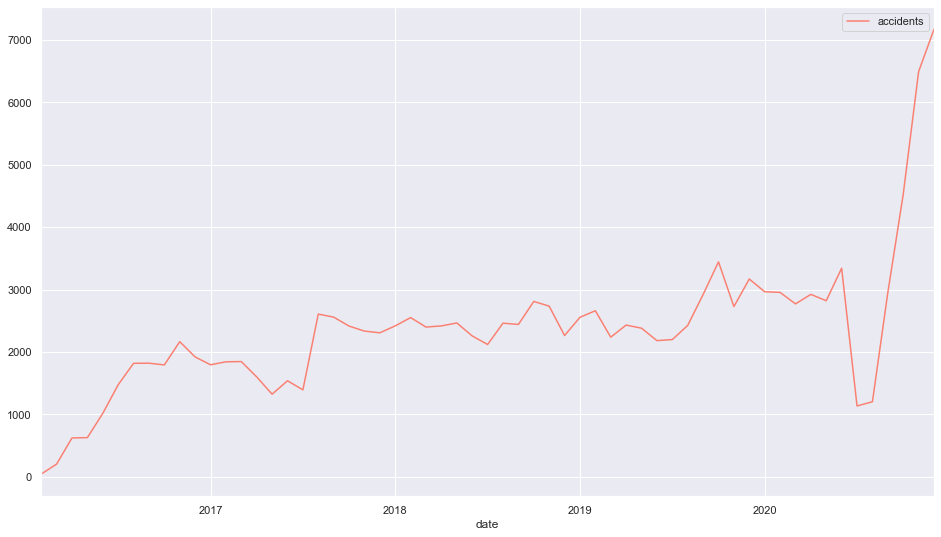

In [330]:
df.plot(figsize = (16,9),color='salmon')

In [309]:
# AD Test

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [310]:
adf_test(df['accidents'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.949988
p-value                  0.771066
# lags used             10.000000
# observations          48.000000
critical value (1%)     -3.574589
critical value (5%)     -2.923954
critical value (10%)    -2.600039
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [311]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARIMAResults,ARMAResults

In [312]:
result = seasonal_decompose(df['accidents'])

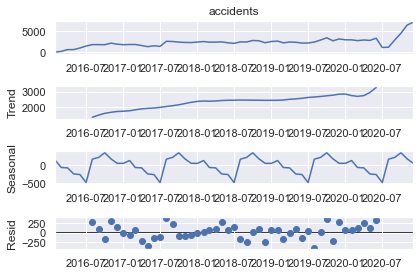

In [313]:
result.plot();

<AxesSubplot:xlabel='date'>

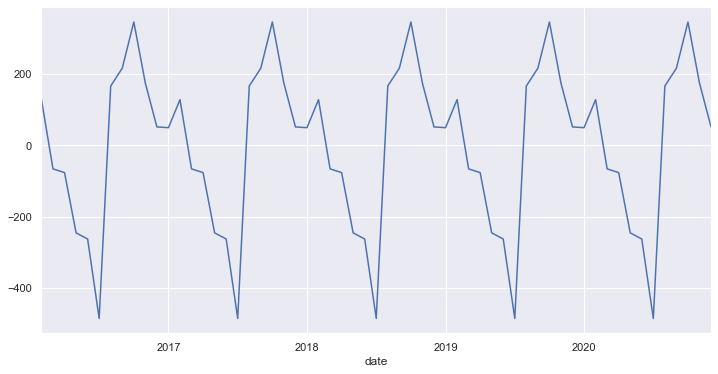

In [314]:
result.seasonal.plot(figsize=(12,6))

In [315]:
auto_arima(df['accidents'],seasonal=True,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=905.444, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=904.082, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=904.448, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=906.046, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=906.111, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=906.183, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=908.138, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=903.744, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=905.752, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=905.734, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=904.198, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=907.709, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.363 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -449.872
Date:                Sat, 10 Apr 2021   AIC                            903.744
Time:                        01:54:25   BIC                            907.865
Sample:                             0   HQIC                           905.349
                                 - 59                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2690      0.086      3.125      0.002       0.100       0.438
sigma2      3.245e+05   3.16e+04     10.274      0.000    2.63e+05    3.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                95.71
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               5.37   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [316]:
len(df)

59

In [317]:
train = df.iloc[:47]
test = df.iloc[47:]

In [325]:
model = ARIMA(df['accidents'],order=(1,1,0))
result = model.fit()

In [326]:
start = len(df)
end = len(df)+11
prediction = result.predict(start,end,typ = 'levels').rename('Prediction')
prediction

2021-01-01    7429.202304
2021-02-01    7586.193163
2021-03-01    7719.529098
2021-04-01    7847.265062
2021-05-01    7973.675312
2021-06-01    8099.771717
2021-07-01    8225.793824
2021-08-01    8351.798342
2021-09-01    8477.798697
2021-10-01    8603.798065
2021-11-01    8729.797200
2021-12-01    8855.796280
Freq: MS, Name: Prediction, dtype: float64

Text(0.5, 1.0, 'Forecasting the accidents in USA in year 2021')

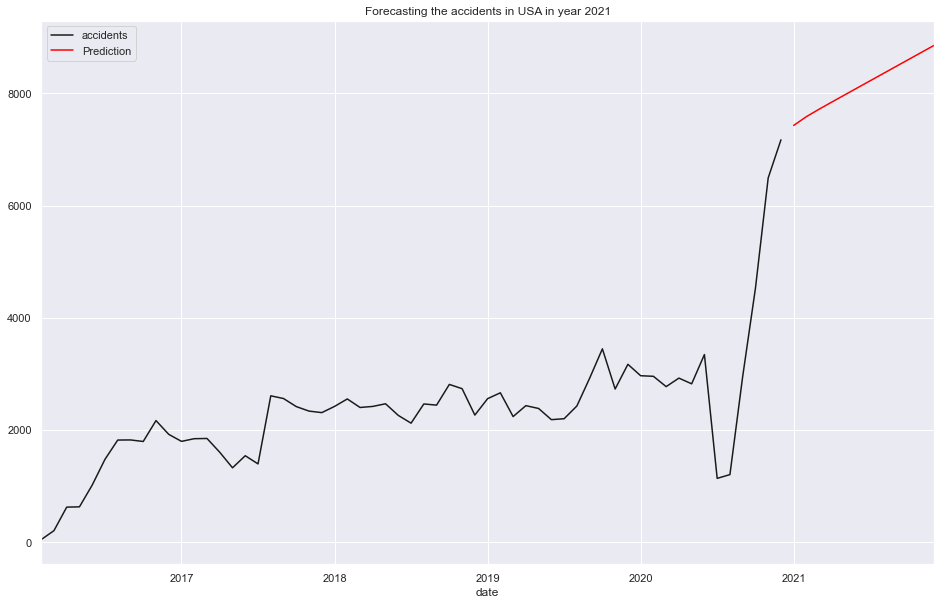

In [329]:
df['accidents'].plot(legend = True,figsize=(16,10),color='k')
prediction.plot(legend=True,color='red')
plt.title('Forecasting the accidents in USA in year 2021')

## Thanks